# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

#image of logo
<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors = pd.read_csv('data/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
colors.tail()

,id,name,rgb,is_trans
212,1086,Pearl Lime,6A7944,f
213,1087,Duplo Pink,FF879C,f
214,1088,Medium Brown,755945,f
215,1089,Warm Tan,CCA373,f
216,9999,[No Color/Any Color],05131D,f


In [4]:
colors['name'].nunique()

217

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,179,179,179
t,38,38,38


In [6]:
colors.is_trans.value_counts()

f    179
t     38
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [7]:
sets_of_lego=pd.read_csv("/content/data/sets.csv")


In [8]:
sets_of_lego.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1979,67,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [9]:
sets_of_lego.tail()

,set_num,name,year,theme_id,num_parts
19540,XWING-1,Mini X-Wing Fighter,2019,158,60
19541,XWING-2,X-Wing Trench Run,2019,158,52
19542,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413
19543,YTERRIER-1,Yorkshire Terrier,2018,598,0
19544,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_of_lego.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
11828,700.2-1,Large Gift Set (ABB),1949,365,178
11833,700.3-1,Medium Gift Set (ABB),1949,365,142
11838,700.A-1,Small Brick Set (ABB),1949,371,24
11815,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11839,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
sets_of_lego[sets_of_lego['year']==1949]

,set_num,name,year,theme_id,num_parts
11815,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
11828,700.2-1,Large Gift Set (ABB),1949,365,178
11833,700.3-1,Medium Gift Set (ABB),1949,365,142
11838,700.A-1,Small Brick Set (ABB),1949,371,24
11839,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [12]:
sets_of_lego.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
4016,31203-1,World Map,2021,709,11695
18484,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
369,10294-1,Titanic,2021,721,9092
350,10276-1,Colosseum,2020,721,9036
13652,75192-1,Millennium Falcon,2017,171,7541


The largest LEGO set ever produced has around 11,700 pieces! 
#1.World Map with 11,695 pieces!
<img src="https://www.gannett-cdn.com/presto/2021/05/25/USAT/48a45508-f880-4765-a600-c1bff6b74b30-31203_Box2_v39_NEW.jpg?width=660&height=538&fit=crop&format=pjpg&auto=webp">

#2.The Ultimate Battle for Chima with 9987 pieces!
<img src='https://img-b.udemycdn.com/redactor/raw/2020-10-10_10-03-07-e8dce27efa5da9efb1c6fd8219c5ae53.jpeg'>

**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [17]:
sets_by_year=sets_of_lego.groupby('year').count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    29
Name: set_num, dtype: int64

In [18]:
sets_by_year['set_num'].tail()

year
2018     881
2019     946
2020     939
2021    1086
2022     594
Name: set_num, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

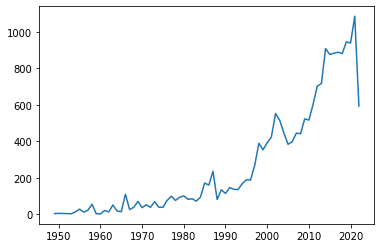

In [23]:
plt.plot(sets_by_year.index,sets_by_year.set_num)

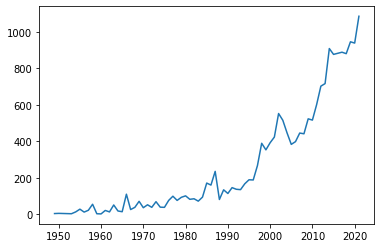

In [26]:
plt.plot(sets_by_year.index[:-1],sets_by_year.set_num[:-1])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [28]:
theme_by_year= sets_of_lego.groupby('year').agg({'theme_id':pd.Series.nunique})

In [33]:
theme_by_year.rename(columns= {'theme_id':'nr_theme'},inplace=True)
theme_by_year.head()

,nr_theme
year,
1949,2
1950,1
1953,2
1954,2
1955,4


In [35]:
theme_by_year.tail()

,nr_theme
year,
2018,89
2019,77
2020,85
2021,75
2022,56


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

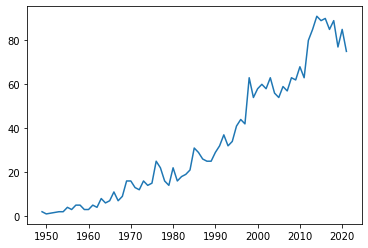

In [37]:
plt.plot(theme_by_year.index[:-1],theme_by_year.nr_theme[:-1])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

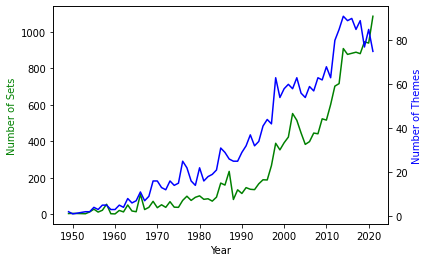

In [45]:
ax1 = plt.gca() 
ax2 = ax1.twinx() 

ax1.plot(sets_by_year.index[:-1],sets_by_year.set_num[:-1],color='g')
ax2.plot(theme_by_year.index[:-1],theme_by_year.nr_theme[:-1],color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets',color='green')
ax2.set_ylabel('Number of Themes',color='blue')


**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [66]:
parts_per_set=sets_of_lego.groupby('year').agg({"num_parts":pd.Series.mean})

In [67]:

parts_per_set.rename(columns={'num_parts':"average_num_parts"},inplace=True)
parts_per_set.head()

,average_num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,15.758621


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

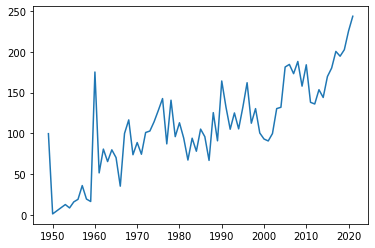

In [69]:
plt.plot(parts_per_set.index[:-1],parts_per_set.average_num_parts[:-1])

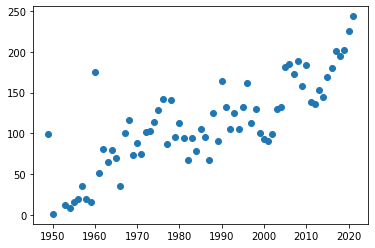

In [70]:
plt.scatter(parts_per_set.index[:-1],parts_per_set.average_num_parts[:-1])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [71]:
set_theme_count = sets_of_lego["theme_id"].value_counts()
set_theme_count[:5]

501    2125
158     836
503     610
494     492
497     491
Name: theme_id, dtype: int64

#The database schema: 

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [72]:
themes_of_logo = pd.read_csv("/content/data/themes.csv")
themes_of_logo.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [73]:
themes_of_logo[themes_of_logo.name=='Star Wars']

,id,name,parent_id
5,18,Star Wars,1.0
78,158,Star Wars,NaN
100,209,Star Wars,207.0
130,261,Star Wars,258.0


In [74]:
sets_of_lego[sets_of_lego.theme_id==18]

,set_num,name,year,theme_id,num_parts
11031,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
14696,8000-1,Pit Droid,2000,18,223
14703,8001-1,Battle Droid,2000,18,336
14714,8002-1,Destroyer Droid,2000,18,567
14736,8007-1,C-3PO,2001,18,339
14737,8008-1,Stormtrooper,2001,18,361
14738,8009-1,R2-D2,2002,18,239
14739,8010-1,Darth Vader,2002,18,388
14750,8011-1,Jango Fett,2002,18,425
14752,8012-1,Super Battle Droid,2002,18,378


In [78]:
sets_of_lego[sets_of_lego.theme_id==158]

,set_num,name,year,theme_id,num_parts
2001,20006-1,Clone Turbo Tank,2008,158,64
2012,20007-1,Republic Attack Cruiser,2009,158,84
2024,20009-1,AT-TE Walker,2009,158,94
2026,20010-1,Republic Gunship,2009,158,94
2032,20016-1,Imperial Shuttle,2010,158,70
...,...,...,...,...,...
19503,VP-4,Star Wars Co-Pack,2000,158,0
19506,VP-8,Star Wars Co-Pack,2000,158,0
19540,XWING-1,Mini X-Wing Fighter,2019,158,60
19541,XWING-2,X-Wing Trench Run,2019,158,52


In [77]:
sets_of_lego[sets_of_lego.theme_id==209]

,set_num,name,year,theme_id,num_parts
13482,75023-1,Star Wars Advent Calendar 2013,2013,209,254
13515,75056-1,Star Wars Advent Calendar 2014,2014,209,275
13549,75097-1,Star Wars Advent Calendar 2015,2015,209,291
13600,75146-1,Star Wars Advent Calendar 2016,2016,209,282
13642,75184-1,Star Wars Advent Calendar 2017,2017,209,309
13675,75213-1,Star Wars Advent Calendar 2018,2018,209,307
13714,75245-1,Star Wars Advent Calendar 2019,2019,209,280
13750,75279-1,Star Wars Advent Calendar 2020,2020,209,311
13776,75307-1,Star Wars Advent Calendar 2021,2021,209,336
14663,7958-1,Star Wars Advent Calendar 2011,2011,209,267


In [76]:
sets_of_lego[sets_of_lego.theme_id==261]

,set_num,name,year,theme_id,num_parts
17958,9748-1,Droid Developer Kit,1999,261,658
17964,9754-1,Dark Side Developer Kit,2000,261,578


Here we see that all of the Star Wars Advent Calendars share the same theme_id. That makes sense.

<img src="https://img-b.udemycdn.com/redactor/raw/2020-10-10_10-20-45-635c014ae055a295c7e605acb5cd3bc1.jpg">

### Merging (i.e., Combining) DataFrames based on a Key


In [79]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,2125
1,158,836
2,503,610
3,494,492
4,497,491


In [80]:
set_theme_count.tail()

,id,set_count
436,210,1
437,212,1
438,724,1
439,510,1
440,414,1


In [82]:
merged_df=pd.merge(set_theme_count, themes_of_logo,on='id')
merged_df.head()

,id,set_count,name,parent_id
0,501,2125,Gear,NaN
1,158,836,Star Wars,NaN
2,503,610,Key Chain,501.0
3,494,492,Friends,NaN
4,497,491,Books,NaN


In [83]:
merged_df.tail()

,id,set_count,name,parent_id
436,210,1,Belville,207.0
437,212,1,Classic Basic,207.0
438,724,1,Avatar,NaN
439,510,1,Boat,507.0
440,414,1,Castle,411.0


<BarContainer object of 10 artists>

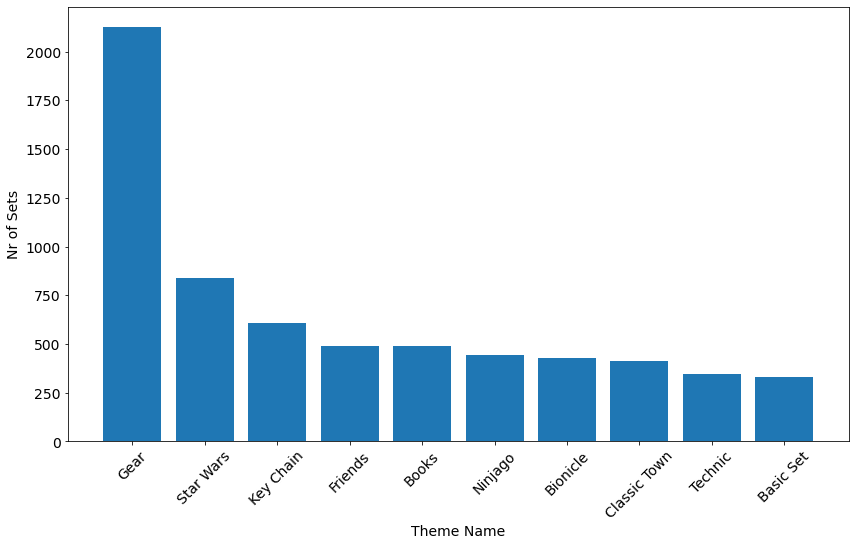

In [87]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
plt.bar(merged_df.name[:10],merged_df.set_count[:10])

<BarContainer object of 20 artists>

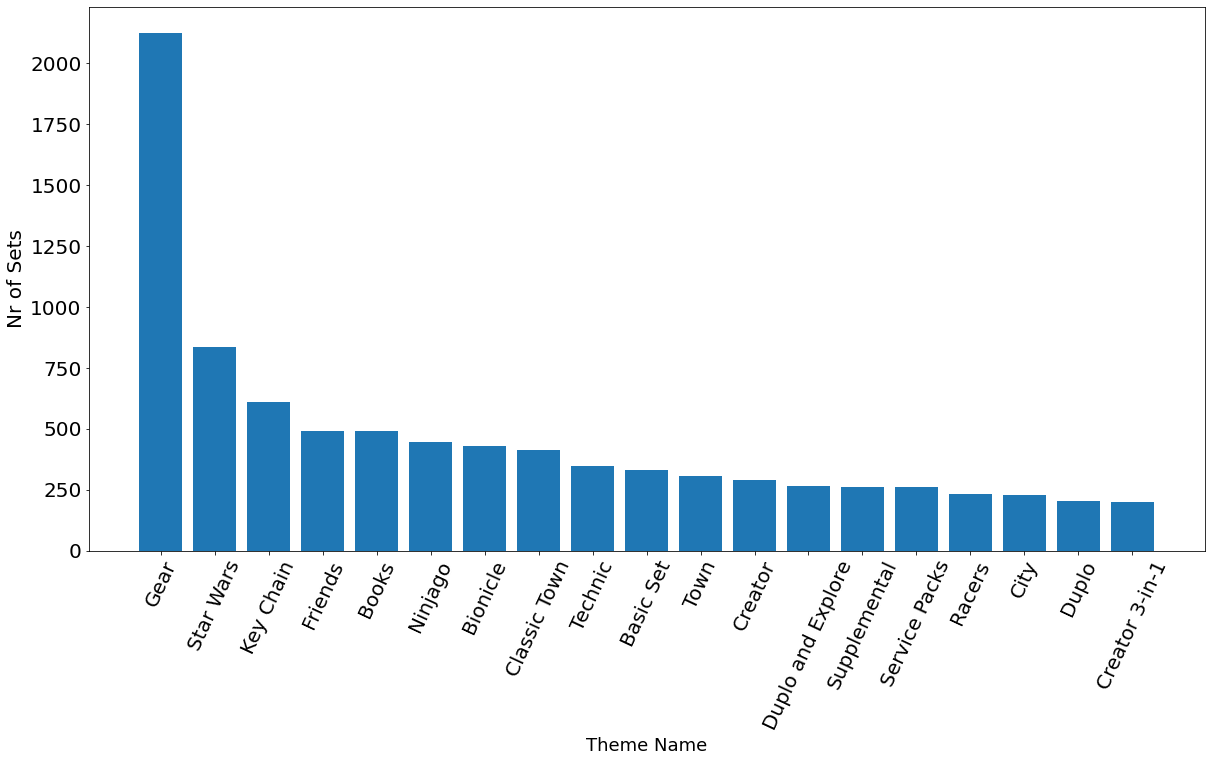

In [93]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=20, rotation=65)
plt.yticks(fontsize=20)
plt.ylabel('Nr of Sets', fontsize=20)
plt.xlabel('Theme Name', fontsize=18)
plt.bar(merged_df.name[:20],merged_df.set_count[:20])